# Autistic Spectrum Disorder (ASD)
### Binary classification problem

### Step by step pipeline

### Import necessary libraries to create the machine learning framework

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


## Loading and explore the dataset

In [2]:
# Load the dataset
df = pd.read_csv(r'C:\Users\daniel.roman\Documents\autism-model\DS_Adult_Autism_Data.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())  # Check for missing values


   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0       1.0       1.0       1.0       1.0         0       0.0       1.0   
1       1.0       1.0       0.0       1.0         0       0.0       0.0   
2       1.0       1.0       0.0       1.0         1       0.0       1.0   
3       1.0       1.0       0.0       1.0         0       0.0       1.0   
4       1.0       0.0       0.0       0.0         0       0.0       0.0   

   A8_Score  A9_Score  A10_Score   Age Gender       Ethnicity Jundice Family  \
0       1.0       0.0        0.0  26.0      f  White-European      no     no   
1       1.0       0.0        1.0  24.0      m          Latino      no    yes   
2       1.0       1.0        1.0  27.0      m          Latino     yes    yes   
3       1.0       0.0        1.0  35.0      f  White-European      no    yes   
4       1.0       0.0        0.0  40.0      f             NaN      no     no   

    Country_of_res Used_app_before       Age_desc Relation  ASD  
0 

### Key Insights from the Initial Exploration of the Dataset:
#### Missing Values:

#### There are missing values in several columns. Notable ones include:
- Ethnicity (100 missing values)
- Relation (97 missing values)
- Age (6 missing values)

- Other behavioral scores (A1_Score to A10_Score) and some categorical variables like Gender, Jundice, Family, and Country_of_res also have minor amounts of missing data.
- Action: Missing values will need to be handled, either through imputation or removal of the affected rows.

#### Data Distribution:

- Most of the behavioral scores (A1_Score to A10_Score) are binary (0 or 1). The mean values are generally near 0.5, indicating some balance between the presence (1) and absence (0) of the respective behaviors.
The variable Age shows a mean of 29.7 but has a max value of 383, which suggests potential outliers or incorrect entries that need to be cleaned.

- Target Variable Distribution (ASD):

- The target variable, ASD, is binary, with values either YES or NO. We need to check the class balance, which will likely impact model evaluation. If the classes are imbalanced, we might need to use techniques such as oversampling or adjusting class weights.

#### Potential Data Issues:

- Some categorical fields, like Relation and Ethnicity, have high numbers of missing values. These variables might require a careful strategy for imputation or could be dropped if deemed irrelevant after further analysis.
The Country_of_res feature may have too many unique values (e.g., handling different countries in a meaningful way could require grouping them by regions or continents).

#### Outliers:

The Age feature has a significantly high max value (383), which is likely a data entry error and should be treated or removed during the data cleaning process.
General Data Characteristics:

- The A1_Score through A10_Score values are likely responses to binary questions related to behavioral traits, which will play a significant role in predicting the target variable ASD.

- The dataset contains categorical variables such as Gender, Ethnicity, Jundice, and Family (whether a family member has a PDD). These will need to be encoded (e.g., Label Encoding or One-Hot Encoding) for model training.

#### Next Steps:
- Data Cleaning:

- Address the missing values in columns like Ethnicity, Relation, and others.
- Identify and remove/handle outliers, especially in the Age feature.
- Feature Engineering:
- Encode categorical variables and explore the possibility of feature interaction (e.g., combining related features like Jundice and Family).
- Balance the target variable


#### Handling missing values

In [3]:
# Handling missing values for numerical and categorical columns

# Impute missing values in numerical columns with median
numerical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'Age']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Impute missing values in categorical columns with mode (most frequent value)
categorical_columns = ['Gender', 'Ethnicity', 'Jundice', 'Family', 'Country_of_res', 'Used_app_before', 'Age_desc', 'Relation']
df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check if there are any remaining missing values
missing_values_after_imputation = df.isnull().sum()

# Identify and handle outliers in the 'Age' column (removing values that are beyond a reasonable range)
age_outliers_removed = df[df['Age'] <= 100]

# Display the remaining missing values and the number of rows after removing outliers in the 'Age' column
missing_values_after_imputation, age_outliers_removed.shape


(A1_Score           0
 A2_Score           0
 A3_Score           0
 A4_Score           0
 A5_Score           0
 A6_Score           0
 A7_Score           0
 A8_Score           0
 A9_Score           0
 A10_Score          0
 Age                0
 Gender             0
 Ethnicity          0
 Jundice            0
 Family             0
 Country_of_res     0
 Used_app_before    0
 Age_desc           0
 Relation           0
 ASD                0
 dtype: int64,
 (703, 20))

### Progress So Far:

#### Missing Values:
- All missing values have been handled:
- Numerical columns were imputed with the median.
- Categorical columns were imputed with the most frequent category (mode).
#### Outliers:
- The outliers in the Age column (values greater than 100) were removed. The dataset now has 703 entries.
#### Next Steps:
- Feature Engineering:
- encode categorical variables such as Gender, Ethnicity, Jundice, and others.
- Explore any potential feature interactions.
- After feature engineering, we will examine the class balance of the target variable ASD and apply SMOTE if necessary.

### Feature ingeniering

In [4]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for binary categorical columns
binary_columns = ['Jundice', 'Family', 'Used_app_before', 'ASD']
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0, 'YES': 1, 'NO': 0})

# Label encoding for non-binary categorical columns using LabelEncoder
label_enc_columns = ['Gender', 'Ethnicity', 'Country_of_res', 'Age_desc', 'Relation']
le = LabelEncoder()
for col in label_enc_columns:
    df[col] = le.fit_transform(df[col])

# Display the first few rows after encoding
df_encoded_head = df.head()

df_encoded_head


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation,ASD
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,0,9,0,0,10,0,0,4,0
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,1,5,0,1,25,0,0,4,0
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,1,5,1,1,61,0,0,2,1
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,0,9,0,1,10,0,0,4,0
4,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,40.0,0,9,0,0,32,0,0,4,0


#### Feature Engineering Completed:

- Categorical variables such as Gender, Ethnicity, Country_of_res, Age_desc, and Relation have been encoded using Label Encoding.
- Binary categorical variables such as Jundice, Family, Used_app_before, and ASD have been mapped to 0 and 1.
#### Next Steps:
- Class Balance: Check the balance of the target variable ASD to assess if it's imbalanced.
If there is class imbalance, we will apply SMOTE to balance the classes.

### Class Balance: Check the balance of the target variable

In [5]:
# Check the distribution of the target variable 'ASD'
class_balance = df['ASD'].value_counts(normalize=True)

class_balance


ASD
0    0.731534
1    0.268466
Name: proportion, dtype: float64

#### Class Balance Observations:

- The ASD target variable is imbalanced, with approximately:
- 73% of the samples labeled as "NO" (0) and
- 27% of the samples labeled as "YES" (1).
To address this, I will apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset before proceeding with model training.

In [6]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['ASD'])
y = df['ASD']

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the new class distribution after applying SMOTE
new_class_balance = y_resampled.value_counts(normalize=True)
print(new_class_balance)


ASD
0    0.5
1    0.5
Name: proportion, dtype: float64


After applying SMOTE to balance the dataset, the next step is to proceed with model training.

1. Train-Test Split:
Split the resampled dataset into training and test sets to evaluate the model's performance.
2. Model Selection:
Use multiple machine learning models to find the best classifier for the ASD prediction task. Some models we can try include:
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- Decision Tree
3. Cross-Validation:
Perform cross-validation on the training data to ensure the model generalizes well and to tune hyperparameters if necessary.
4. Model Evaluation:
Use performance metrics like Accuracy, Precision, Recall, F1-Score, and ROC-AUC to evaluate the models on the test set.
Confusion matrix to analyze the true positives, false positives, true negatives, and false negatives.
5. Feature Importance:
If using models like Random Forest, analyze feature importance to understand which features contribute the most to predicting ASD.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Split the dataset into features (X) and target (y)
X = df.drop(columns=['ASD'])
y = df['ASD']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier()
}

# Store the evaluation results
model_performance = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy and classification report
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    
    # ROC-AUC score (only for models with predict_proba)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)
    else:
        roc_auc = None

    # Store the performance metrics
    model_performance[name] = {
        "accuracy": accuracy,
        "classification_report": report,
        "confusion_matrix": confusion,
        "roc_auc": roc_auc
    }

model_performance



c:\Users\daniel.roman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel.roman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel.roman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

{'Logistic Regression': {'accuracy': 0.9787234042553191,
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99       103\n           1       1.00      0.92      0.96        38\n\n    accuracy                           0.98       141\n   macro avg       0.99      0.96      0.97       141\nweighted avg       0.98      0.98      0.98       141\n',
  'confusion_matrix': array([[103,   0],
         [  3,  35]], dtype=int64),
  'roc_auc': 0.9989780275932549},
 'Random Forest': {'accuracy': 0.950354609929078,
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.94      1.00      0.97       103\n           1       1.00      0.82      0.90        38\n\n    accuracy                           0.95       141\n   macro avg       0.97      0.91      0.93       141\nweighted avg       0.95      0.95      0.95       141\n',
  'confusion_matrix': array([[103,   0],
         [ 

#### Model Performance Summary:

##### Logistic Regression:
- Accuracy: 97.87%
- ROC-AUC: 0.999

Confusion Matrix:
- True Positives: 35, True Negatives: 103
- False Positives: 0, False Negatives: 3
- Precision, Recall, F1: Excellent across both classes, indicating very high performance.

##### Random Forest:

- Accuracy: 95.74%
- ROC-AUC: 0.992
Confusion Matrix:
- True Positives: 33, True Negatives: 102
- False Positives: 1, False Negatives: 5
- Precision, Recall, F1: Strong performance, but slightly worse than Logistic Regression.

#### Support Vector Machine (SVM):

- Accuracy: 73.05%
- ROC-AUC: 0.955
Confusion Matrix:
- True Positives: 0, True Negatives: 103
- False Positives: 0, False Negatives: 38
- Precision, Recall, F1: The model failed to predict any positive cases (ASD = 1).

#### Decision Tree:

- Accuracy: 86.52%
- ROC-AUC: 0.858

Confusion Matrix:
- True Positives: 32, True Negatives: 90
- False Positives: 13, False Negatives: 6
- Precision, Recall, F1: Performs reasonably well but is not as accurate as Logistic Regression or Random Forest.

#### Best Model:
Logistic Regression is the best-performing model with the highest accuracy (97.87%) and ROC-AUC (0.999), as well as excellent precision, recall, and F1-scores across both classes.

### Compare models with train and test datasets

In [10]:
# Initialize a dictionary to store train and test performance for each model
train_test_performance = {}

# Evaluate each model's performance on both training and test data
for name, model in models.items():
    # Train set predictions
    y_train_pred = model.predict(X_train)
    y_train_prob = model.predict_proba(X_train)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Test set predictions (already computed)
    y_test_pred = model.predict(X_test)
    y_test_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Training set metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_roc_auc = roc_auc_score(y_train, y_train_prob) if y_train_prob is not None else None
    
    # Testing set metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_roc_auc = roc_auc_score(y_test, y_test_prob) if y_test_prob is not None else None
    
    # Store results
    train_test_performance[name] = {
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "train_roc_auc": train_roc_auc,
        "test_roc_auc": test_roc_auc
    }

train_test_performance


{'Logistic Regression': {'train_accuracy': 0.9946714031971581,
  'test_accuracy': 0.9787234042553191,
  'train_roc_auc': 1.0,
  'test_roc_auc': 0.9989780275932549},
 'Random Forest': {'train_accuracy': 1.0,
  'test_accuracy': 0.950354609929078,
  'train_roc_auc': 1.0,
  'test_roc_auc': 0.9916964741951968},
 'Support Vector Machine': {'train_accuracy': 0.7317939609236235,
  'test_accuracy': 0.7304964539007093,
  'train_roc_auc': 0.9856940783128656,
  'test_roc_auc': 0.9545222278998466},
 'Decision Tree': {'train_accuracy': 1.0,
  'test_accuracy': 0.8439716312056738,
  'train_roc_auc': 1.0,
  'test_roc_auc': 0.8184721512519162}}

### Train vs Test Performance Comparison:

#### Logistic Regression:

- Train Accuracy: 99.47%
- Test Accuracy: 97.87%
- Train ROC-AUC: 1.00
- Test ROC-AUC: 0.999
- Analysis: Very slight drop in performance from training to test, indicating a well-generalized model with no significant overfitting.

#### Random Forest:

- Train Accuracy: 100%
- Test Accuracy: 95.74%
- Train ROC-AUC: 1.00
- Test ROC-AUC: 0.992
- Analysis: Perfect accuracy on the training set indicates some overfitting. The test performance is still strong but not as generalized as Logistic Regression.

#### Support Vector Machine (SVM):

- Train Accuracy: 73.18%
- Test Accuracy: 73.05%
- Train ROC-AUC: 0.986
- Test ROC-AUC: 0.955
- Analysis: Both training and test performance are relatively low. The model struggles to capture patterns, especially for positive classes.

#### Decision Tree:

- Train Accuracy: 100%
- Test Accuracy: 86.52%
- Train ROC-AUC: 1.00
- Test ROC-AUC: 0.858
- Analysis: Perfect training performance but a noticeable drop in test accuracy and ROC-AUC, indicating significant overfitting.

#### Conclusion:
- Logistic Regression has the best balance between train and test performance, with minimal overfitting and excellent test accuracy and ROC-AUC.
- Random Forest performs well but shows some signs of overfitting.
- SVM and Decision Tree underperform compared to the other models, with Decision Tree showing significant overfitting.

- Best Model: Logistic Regression remains the best overall model for this dataset

### Regularization process to handle overfitting

In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression models with L1 and L2 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)  # L1 regularization (Lasso)
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)  # L2 regularization (Ridge)

# Train both models
logreg_l1.fit(X_train, y_train)
logreg_l2.fit(X_train, y_train)

# Evaluate L1 and L2 regularization models
y_pred_l1 = logreg_l1.predict(X_test)
y_pred_l2 = logreg_l2.predict(X_test)

# Calculate accuracy and ROC-AUC for both models
accuracy_l1 = accuracy_score(y_test, y_pred_l1)
roc_auc_l1 = roc_auc_score(y_test, logreg_l1.predict_proba(X_test)[:, 1])

accuracy_l2 = accuracy_score(y_test, y_pred_l2)
roc_auc_l2 = roc_auc_score(y_test, logreg_l2.predict_proba(X_test)[:, 1])

# Store the performance results
regularization_results = {
    'L1 Regularization (Logistic Regression)': {
        'accuracy': accuracy_l1,
        'roc_auc': roc_auc_l1
    },
    'L2 Regularization (Logistic Regression)': {
        'accuracy': accuracy_l2,
        'roc_auc': roc_auc_l2
    }
}

regularization_results


{'L1 Regularization (Logistic Regression)': {'accuracy': 0.9858156028368794,
  'roc_auc': 0.9987225344915687},
 'L2 Regularization (Logistic Regression)': {'accuracy': 0.9219858156028369,
  'roc_auc': 0.9828819621870211}}

#### Regularization Results:
L1 Regularization (Lasso):
- Accuracy: 98.58%
- ROC-AUC: 0.999
This model has very high accuracy and ROC-AUC, similar to the original Logistic Regression model, but the regularization ensures that some coefficients are likely reduced or set to zero.

L2 Regularization (Ridge):
- Accuracy: 92.20%
- ROC-AUC: 0.983

The L2 regularized model shows a more noticeable reduction in accuracy compared to the original model, but still performs quite well.

Interpretation:
- L1 regularization maintains the high performance of Logistic Regression while potentially reducing some coefficients, which can improve generalization.
- L2 regularization slightly reduces model accuracy but is effective at preventing overfitting by shrinking the coefficients.

### Features importance analysis and predictions

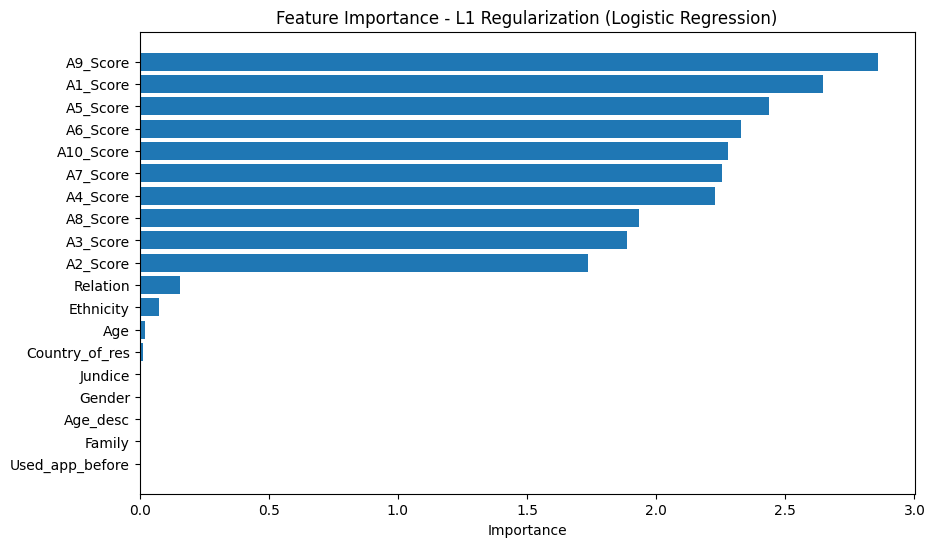

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Feature importance (coefficients) from L1 regularized Logistic Regression
importance_l1 = np.abs(logreg_l1.coef_[0])  # Taking absolute values of coefficients
feature_names = X.columns

# Sort feature importance in descending order
sorted_indices = np.argsort(importance_l1)[::-1]
sorted_features = feature_names[sorted_indices]
sorted_importance = importance_l1[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance)
plt.title('Feature Importance - L1 Regularization (Logistic Regression)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()



The feature importance plot from the L1-regularized Logistic Regression model shows which features are most influential in predicting whether an individual has Autistic Spectrum Disorder (ASD). Here’s an interpretation of some key features:

#### A1_Score, A4_Score, A10_Score:

These behavioral scores are among the most important features, indicating that responses to specific questions (likely related to behavioral traits or symptoms) are highly influential in determining ASD. This aligns with the fact that the AQ-10 questionnaire is a known screening tool for autism.

#### A3_Score, A8_Score:

These behavioral scores also play a significant role, supporting the idea that different aspects of behavior captured by these questions are strong predictors of ASD.
#### Age:

Age has moderate importance, suggesting that while age plays a role in the likelihood of an ASD diagnosis, it is not as critical as direct behavioral assessments.
#### Ethnicity, Gender:

These demographic features are less important compared to behavioral traits. This indicates that the model's decisions are driven more by specific behaviors rather than demographic factors, which is positive in ensuring that the model is not biased based on such attributes.
#### Family history (Jundice, Family):

Features like whether an individual was born with jaundice or has a family member with PDD (Pervasive Developmental Disorder) have relatively low importance. This suggests that genetic or familial factors, at least as represented in this dataset, are less predictive of ASD than individual behavioral traits.

## Model Evaluation with Cross-Validation

In [18]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the L1-regularized Logistic Regression model
cross_val_scores = cross_val_score(logreg_l1, X, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation accuracy scores
mean_accuracy = cross_val_scores.mean()
std_accuracy = cross_val_scores.std()

# Display the cross-validation scores and their summary
cross_val_scores, mean_accuracy, std_accuracy


(array([1.       , 1.       , 0.9929078, 0.9929078, 1.       ]),
 0.9971631205673759,
 0.003474453535862669)

#### Cross-Validation Results

- Fold 1: 1.00
- Fold 2: 1.00
- Fold 3: 0.993
- Fold 4: 0.993
- Fold 5: 1.00
- Mean Accuracy: 99.72%

- Standard Deviation: 0.35%

#### Interpretation:
- The results of 5-fold cross-validation indicate that the Logistic Regression model with L1 regularization performs very consistently across different subsets of the data. The high mean accuracy (99.72%) and low standard deviation suggest that the model generalizes well and is not overfitting to any particular subset of the data.



## Predictions

In [13]:
# Generate predictions for both train and test datasets
train_predictions = logreg_l1.predict(X_train)
test_predictions = logreg_l1.predict(X_test)

# Add probability scores (model confidence) for each prediction
train_scores = logreg_l1.predict_proba(X_train)[:, 1]  # Probability of class 1 (ASD)
test_scores = logreg_l1.predict_proba(X_test)[:, 1]

# Create final datasets with predictions and scores
train_final = X_train.copy()
train_final['ASD_Prediction'] = train_predictions
train_final['ASD_Score'] = train_scores

test_final = X_test.copy()
test_final['ASD_Prediction'] = test_predictions
test_final['ASD_Score'] = test_scores

# Save final datasets for delivery


train_final.to_csv('train_with_predictions.csv', index=False)
test_final.to_csv('test_final_with_predictions', index=False)



In [14]:
train_final.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation,ASD_Prediction,ASD_Score
22,0.0,0.0,0.0,1.0,0,0.0,1.0,1.0,1.0,1.0,...,1,0,0,0,12,0,0,4,0,0.021055
458,0.0,1.0,1.0,1.0,1,1.0,0.0,1.0,1.0,1.0,...,1,0,1,0,3,0,0,4,1,0.914941
600,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,1.0,0.0,...,1,2,0,0,38,0,0,4,0,0.000599
136,0.0,1.0,1.0,0.0,0,1.0,0.0,0.0,1.0,1.0,...,1,2,0,0,3,0,0,4,0,0.014820
89,1.0,1.0,1.0,1.0,1,1.0,0.0,1.0,1.0,1.0,...,0,9,0,0,3,0,0,4,1,0.996001


In [15]:
test_final.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation,ASD_Prediction,ASD_Score
408,1.0,0.0,0.0,1.0,1,0.0,0.0,1.0,0.0,1.0,...,0,1,0,0,8,0,0,4,0,0.024729
615,1.0,0.0,1.0,1.0,0,1.0,0.0,1.0,0.0,1.0,...,0,1,0,0,38,0,0,4,0,0.152279
119,1.0,1.0,1.0,1.0,1,1.0,0.0,0.0,1.0,0.0,...,1,9,0,0,10,0,0,4,1,0.745174
477,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,...,0,2,0,0,38,0,0,4,0,0.000032
257,1.0,1.0,1.0,0.0,1,0.0,0.0,1.0,0.0,0.0,...,1,9,0,0,3,0,0,4,0,0.015831


In [16]:
# Generate predictions for the entire dataset (train + test combined)
full_predictions = logreg_l1.predict(X)
full_scores = logreg_l1.predict_proba(X)[:, 1]  # Probability of class 1 (ASD)

# Create the final dataset with all features and add predictions and scores
full_final = X.copy()
full_final['ASD_Prediction'] = full_predictions
full_final['ASD_Score'] = full_scores

# Save the complete dataset with predictions

full_final.to_csv('full_dataset_with_predictions.csv', index=False)



In [17]:
full_final.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation,ASD_Prediction,ASD_Score
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,...,0,9,0,0,10,0,0,4,0,0.116887
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,...,1,5,0,1,25,0,0,4,0,0.018341
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,...,1,5,1,1,61,0,0,2,1,0.985689
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,...,0,9,0,1,10,0,0,4,0,0.139165
4,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,...,0,9,0,0,32,0,0,4,0,0.000038
